In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [11]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [12]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Id,127,889,793,110,422,1197,561,1041,503,576
MSSubClass,120,20,60,20,20,60,20,20,20,50
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RL,RL
LotFrontage,NaN,95.0,92.0,105.0,NaN,58.0,NaN,88.0,70.0,80.0
LotArea,4928,15865,9920,11751,16635,14054,11341,13125,9170,8480
...,...,...,...,...,...,...,...,...,...,...
MoSold,2,10,6,1,6,11,5,1,4,10
YrSold,2007,2007,2007,2010,2009,2006,2010,2006,2007,2008
SaleType,WD,WD,WD,COD,WD,New,WD,WD,WD,COD
SaleCondition,Normal,Normal,Normal,Normal,Normal,Partial,Normal,Normal,Normal,Abnorml


In [14]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

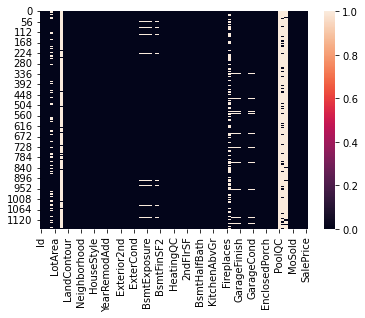

In [15]:
sns.heatmap(df.isnull())

As per above visualization it shows there are so many of null values

In [16]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Filling Null values with Simple Imputer

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imp=SimpleImputer(strategy='mean')
df['LotFrontage']=imp.fit_transform(df['LotFrontage'].values.reshape(-1,1))

In [26]:
df['MasVnrArea']=imp.fit_transform(df['MasVnrArea'].values.reshape(-1,1))
df['BsmtFinSF1']=imp.fit_transform(df['BsmtFinSF1'].values.reshape(-1,1))
df['GarageYrBlt']=imp.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))

In [20]:
sim=SimpleImputer(strategy='most_frequent')

In [22]:
df['Alley']=sim.fit_transform(df['Alley'].values.reshape(-1,1))

In [23]:
df['BsmtQual']=sim.fit_transform(df['BsmtQual'].values.reshape(-1,1))
df['BsmtCond']=sim.fit_transform(df['BsmtCond'].values.reshape(-1,1))

In [24]:
df['BsmtExposure']=sim.fit_transform(df['BsmtExposure'].values.reshape(-1,1))
df['BsmtFinType1']=sim.fit_transform(df['BsmtFinType1'].values.reshape(-1,1))
df['BsmtFinType2']=sim.fit_transform(df['BsmtFinType2'].values.reshape(-1,1))

In [25]:
df['FireplaceQu']=sim.fit_transform(df['FireplaceQu'].values.reshape(-1,1))
df['GarageType']=sim.fit_transform(df['GarageType'].values.reshape(-1,1))
df['GarageFinish']=sim.fit_transform(df['GarageFinish'].values.reshape(-1,1))
df['GarageQual']=sim.fit_transform(df['GarageQual'].values.reshape(-1,1))
df['GarageCond']=sim.fit_transform(df['GarageCond'].values.reshape(-1,1))
df['PoolQC']=sim.fit_transform(df['PoolQC'].values.reshape(-1,1))
df['Fence']=sim.fit_transform(df['Fence'].values.reshape(-1,1))
df['MiscFeature']=sim.fit_transform(df['MiscFeature'].values.reshape(-1,1))
df['MasVnrType']=sim.fit_transform(df['MasVnrType'].values.reshape(-1,1))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [29]:
feature_ob= ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig', 'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond']

In [36]:
for i in feature_ob:
    print(df[i].value_counts())

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Pave    1164
Grvl       4
Name: Street, dtype: int64
Grvl    1132
Pave      36
Name: Alley, dtype: int64
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
AllPub    1168
Name: Utilities, dtype: int64
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1005

As per above data teh object data is distributed in different different catagories

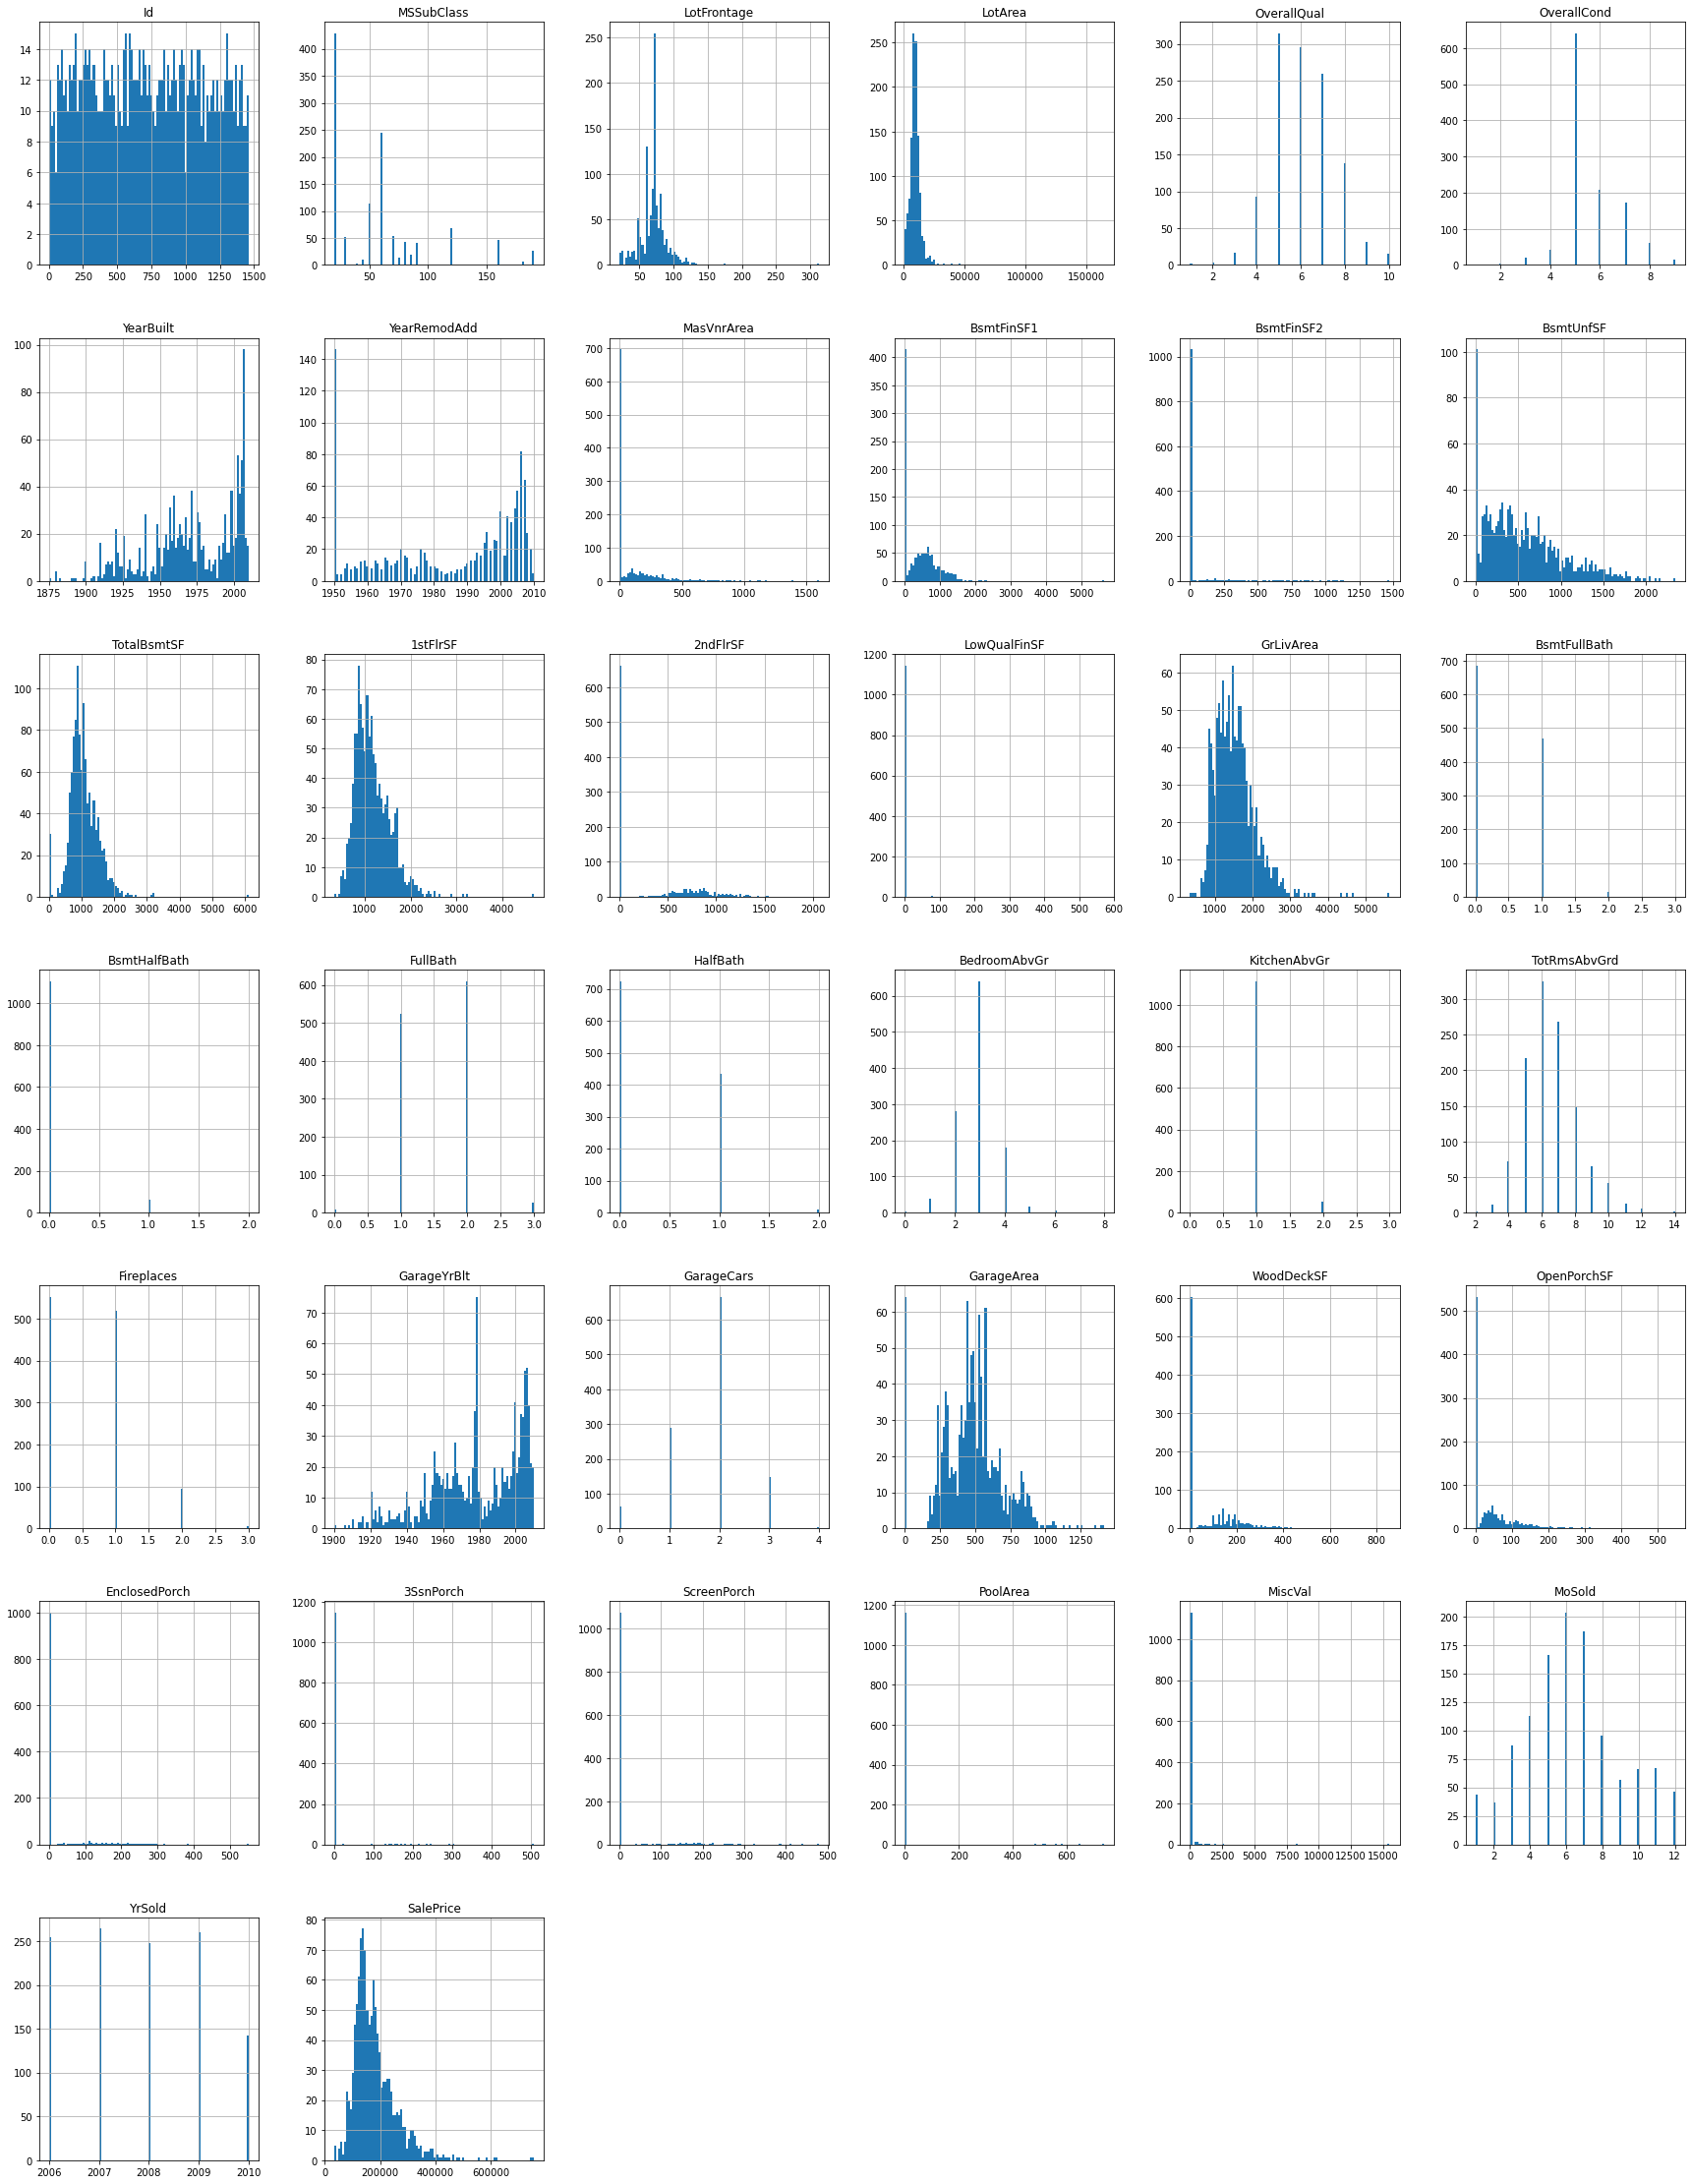

In [37]:
df.hist(figsize= (30,40), bins =100, xlabelsize = 10, ylabelsize = 10)
plt.show()

# Lable Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [41]:
df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,70.988470,10484.749144,0.996575,0.030822,1.938356,2.773973,0.0,...,3.448630,1.994863,1.880993,1.996575,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,22.437056,8957.442311,0.058445,0.172909,1.412262,0.710027,0.0,...,44.896939,0.092426,0.457685,0.092505,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,360.500000,20.000000,3.000000,60.000000,7621.500000,1.000000,0.000000,0.000000,3.000000,0.0,...,0.000000,2.000000,2.000000,2.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,714.500000,50.000000,3.000000,70.988470,9522.500000,1.000000,0.000000,3.000000,3.000000,0.0,...,0.000000,2.000000,2.000000,2.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,1079.500000,70.000000,3.000000,79.250000,11515.500000,1.000000,0.000000,3.000000,3.000000,0.0,...,0.000000,2.000000,2.000000,2.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,1460.000000,190.000000,4.000000,313.000000,164660.000000,1.000000,1.000000,3.000000,3.000000,0.0,...,738.000000,2.000000,3.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


As per above data ther difference between min,25%,50%,75% and max are not equal so skewness is present in Data

In [42]:
df_test.shape

(292, 80)

In [43]:
df.shape

(1168, 81)

In [47]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.004259,0.009307,-0.005969,-0.029212,0.003613,-0.009049,0.022978,-0.020245,NaN,...,0.065832,-0.013705,-0.003887,0.005644,0.001304,0.023479,-0.008853,0.024384,-0.014726,-0.023897
MSSubClass,0.004259,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.216396,0.104485,-0.021387,NaN,...,0.009583,-0.002076,0.043111,0.005979,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.009307,0.007478,1.000000,-0.069661,-0.023328,0.140215,-0.371755,0.053655,0.001175,NaN,...,-0.001663,0.001204,-0.035770,0.000802,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.005969,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.187657,-0.144523,-0.073451,NaN,...,0.196001,-0.165312,-0.051760,0.008257,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.029212,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.093239,-0.189201,-0.159038,NaN,...,0.097107,-0.047619,-0.003495,-0.017412,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.023479,-0.016015,-0.051646,0.022517,0.015141,-0.008860,-0.050530,-0.050418,-0.023872,NaN,...,-0.038624,0.034737,-0.015444,-0.002149,-0.008773,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.008853,-0.038595,-0.004964,-0.003885,-0.035399,-0.019635,-0.007352,0.021421,0.009499,NaN,...,-0.066063,0.061556,-0.021308,0.001527,-0.008439,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.024384,0.035050,0.079854,-0.035356,0.005421,0.025920,-0.002348,-0.015161,-0.041763,NaN,...,0.014047,-0.018351,-0.003769,-0.012223,0.015900,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.014726,-0.028981,0.004501,0.065091,0.034236,0.014176,-0.043124,-0.054905,0.047715,NaN,...,-0.074354,0.121812,0.045229,-0.007701,0.012178,-0.003462,0.024505,0.143557,1.000000,0.217687


<AxesSubplot:>

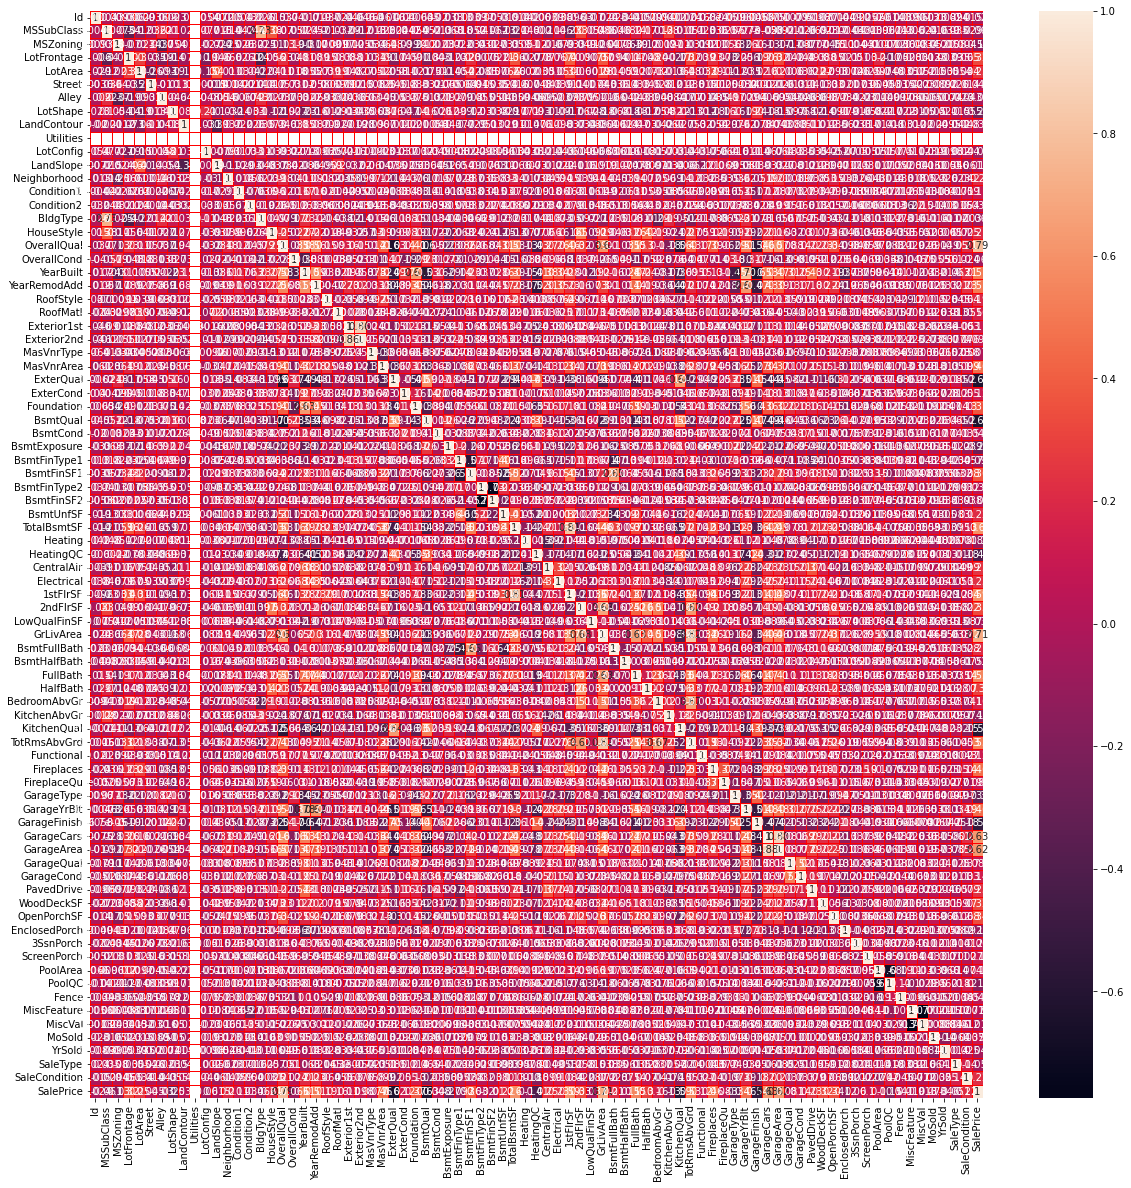

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, linewidth=1, linecolor='red')

This is very huge data we are unable to check the coorelation between features and target variables 

# Checking Skewness

In [54]:
df.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 81, dtype: float64

Skewness more than +/-0.5 will be treated Removing skewness from numerical data

only Target variable has skewness present others are catagorical

# Removing Skewness

In [55]:
from sklearn.preprocessing import power_transform

In [59]:
df[['MSSubClass','LotFrontage' , 'LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath' ,'FullBath' ,'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt' , 'GarageCars' ,'GarageArea','WoodDeckSF','OpenPorchSF' ,'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea' ,'MiscVal','MoSold','YrSold','SalePrice']]=power_transform(df[['MSSubClass','LotFrontage' , 'LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath' ,'FullBath' ,'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt' , 'GarageCars' ,'GarageArea','WoodDeckSF','OpenPorchSF' ,'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea' ,'MiscVal','MoSold','YrSold','SalePrice']],method='yeo-johnson')

# Checking Outliers

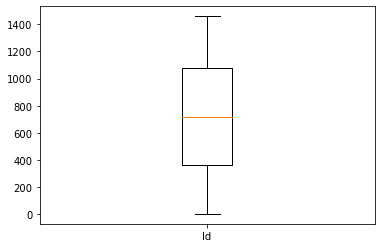

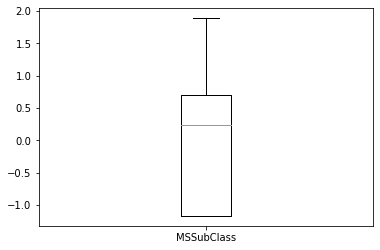

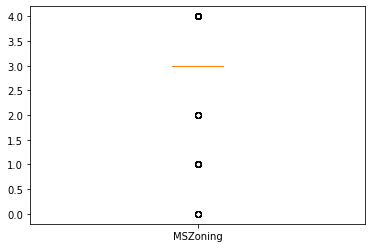

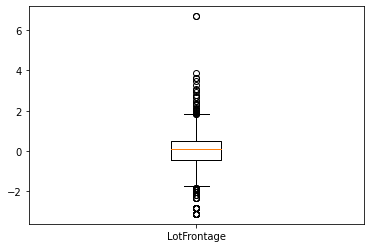

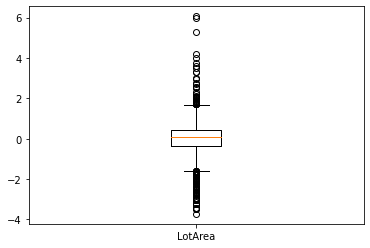

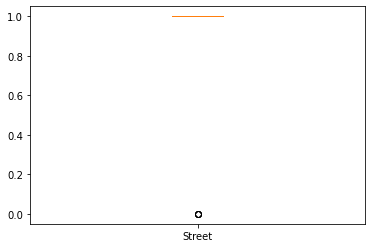

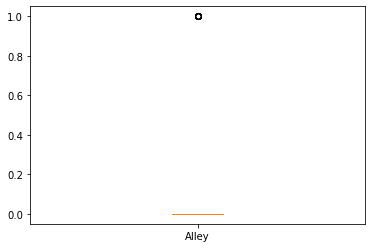

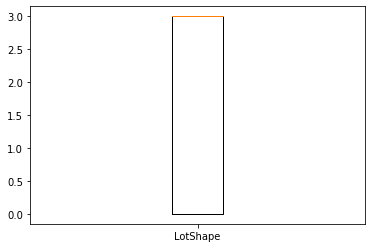

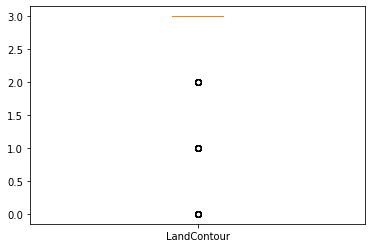

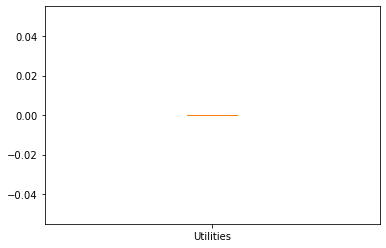

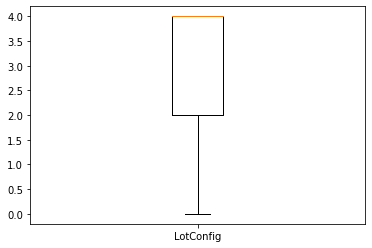

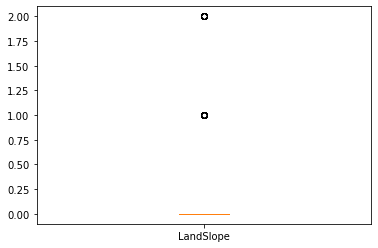

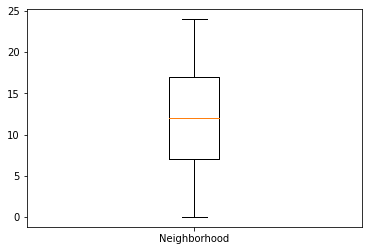

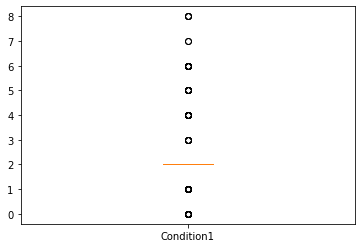

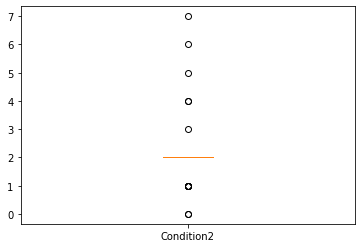

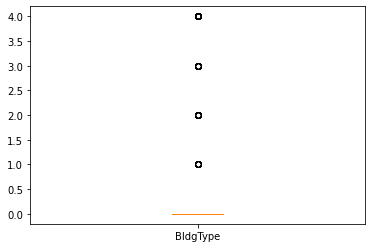

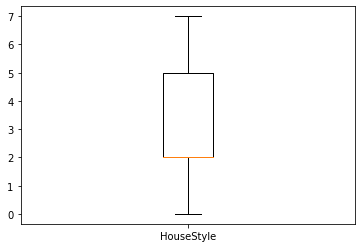

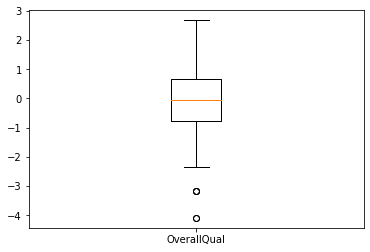

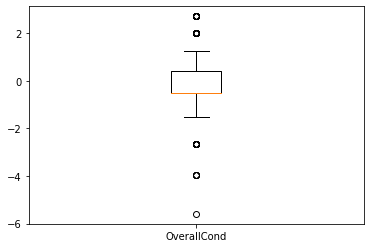

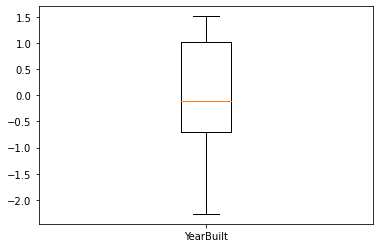

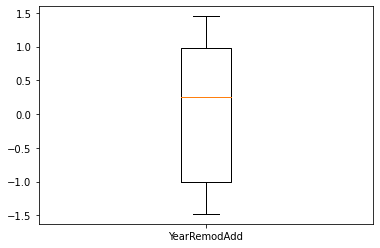

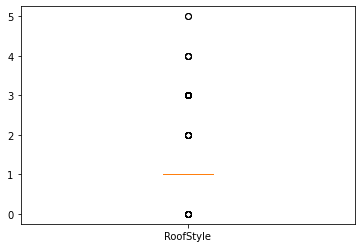

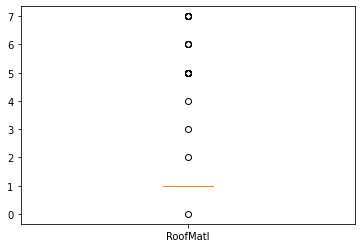

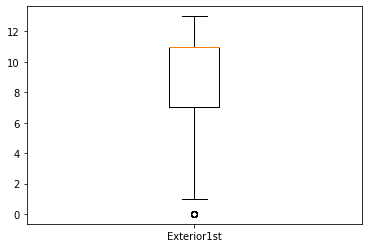

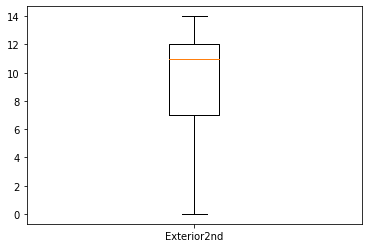

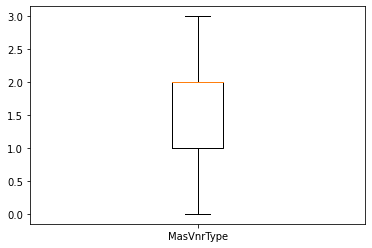

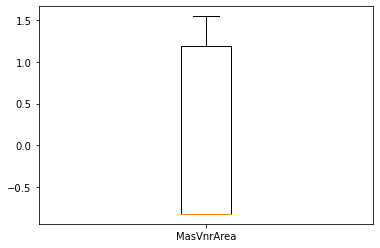

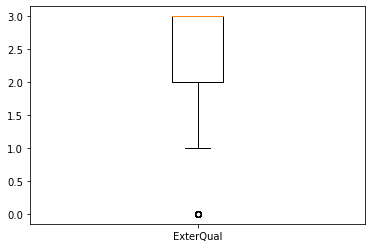

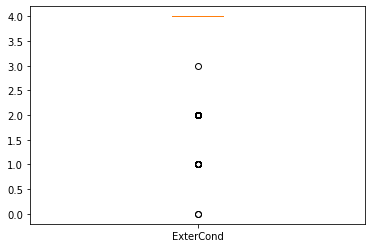

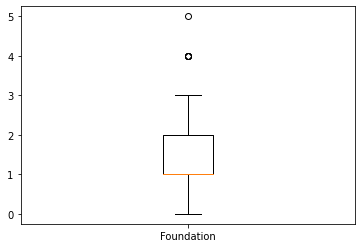

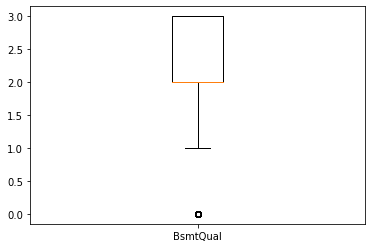

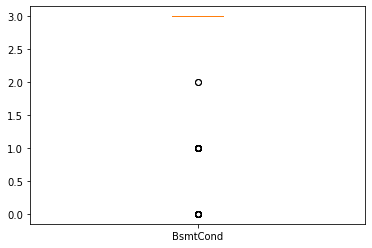

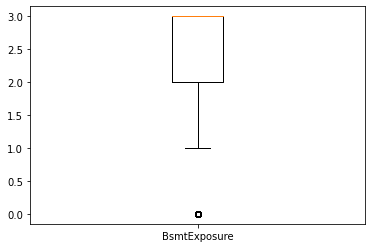

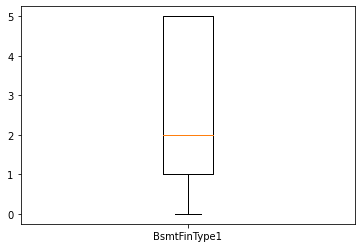

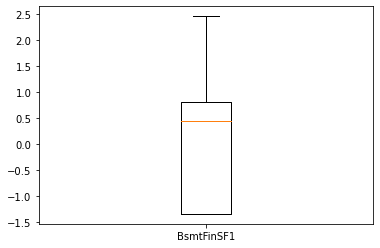

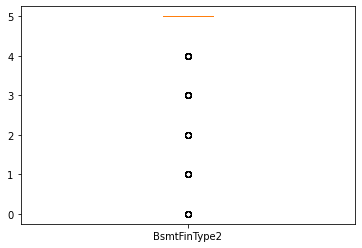

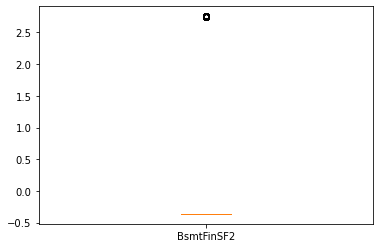

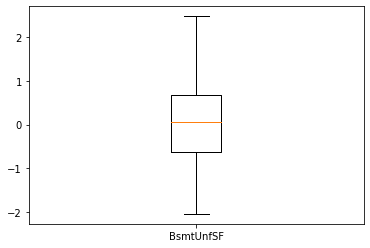

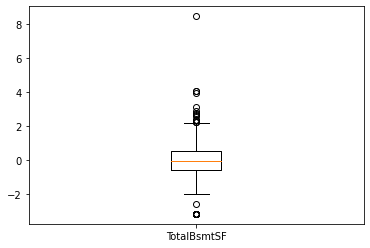

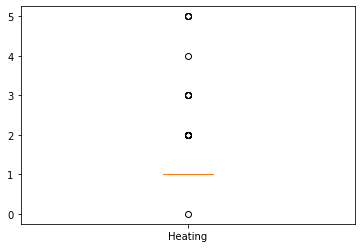

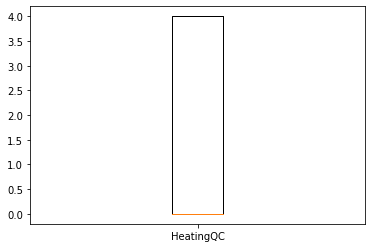

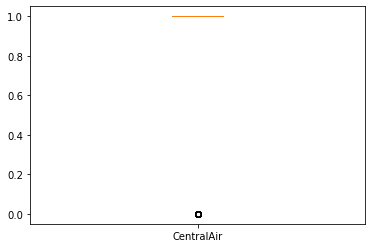

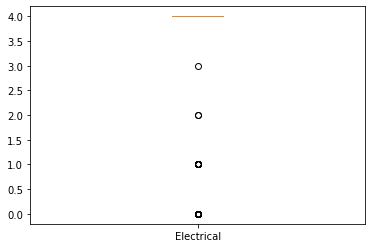

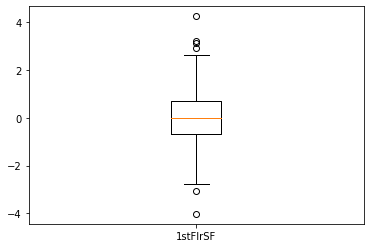

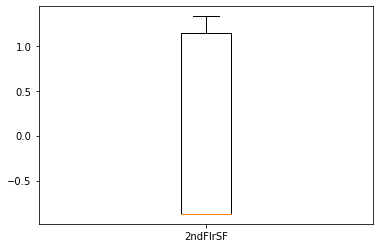

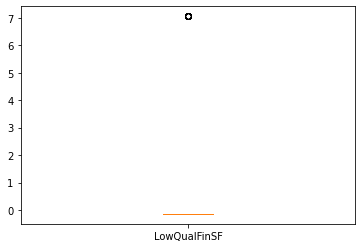

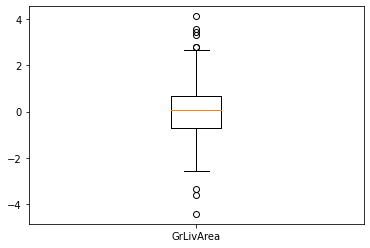

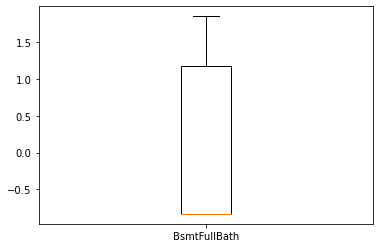

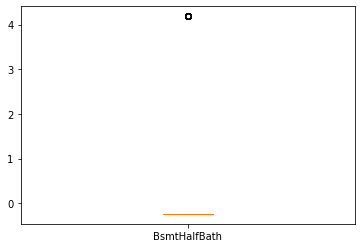

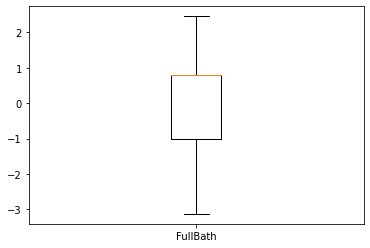

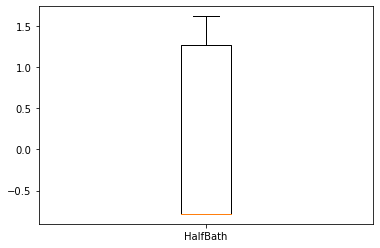

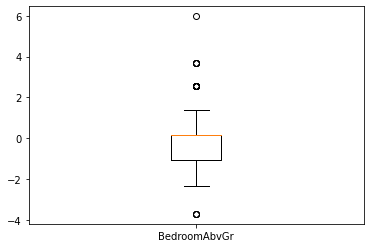

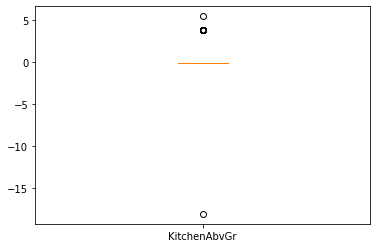

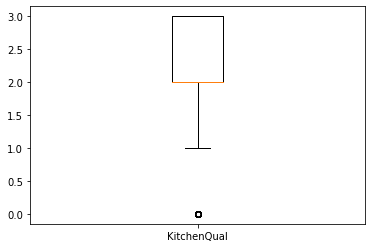

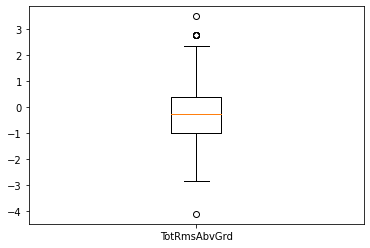

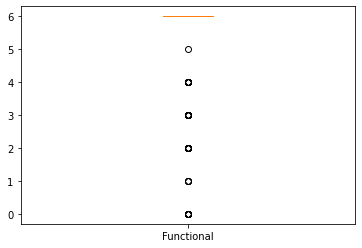

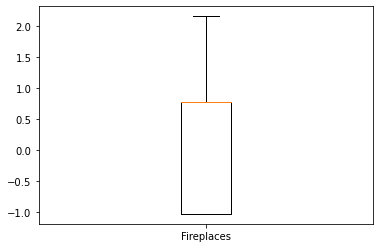

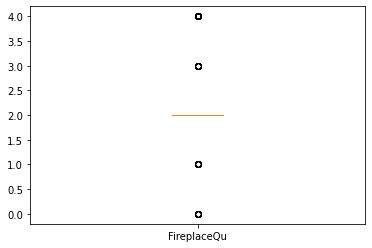

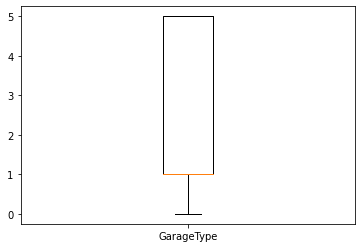

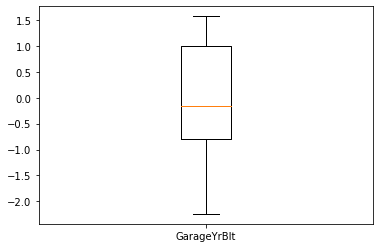

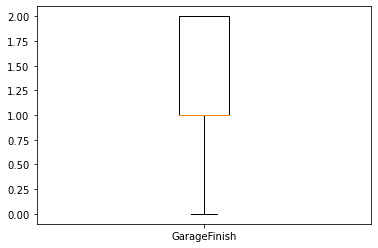

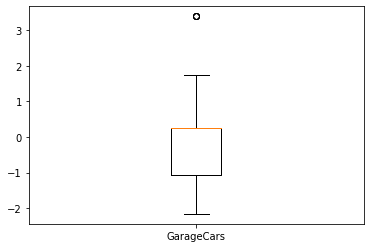

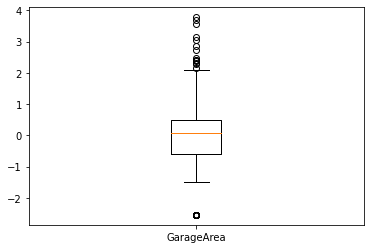

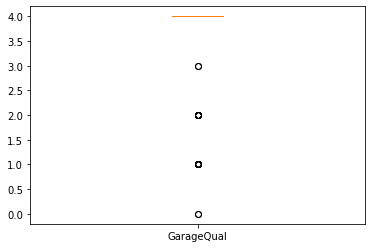

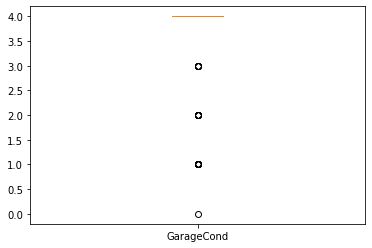

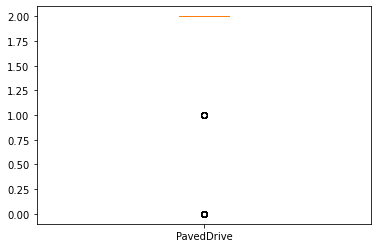

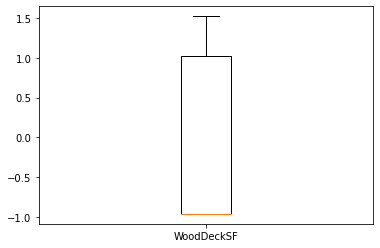

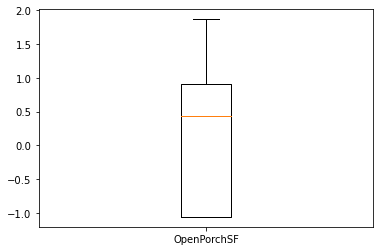

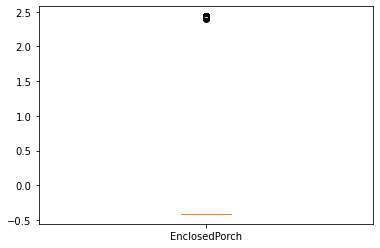

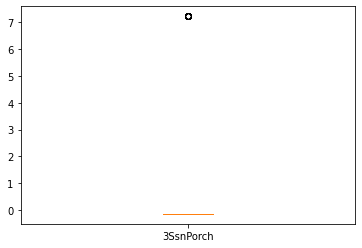

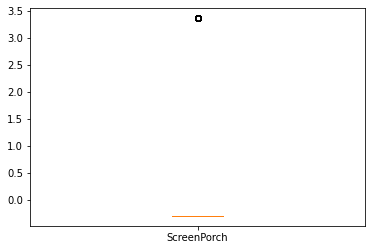

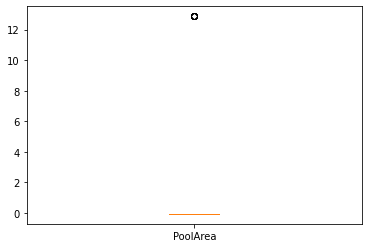

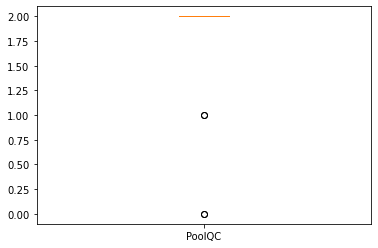

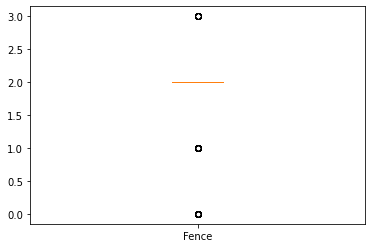

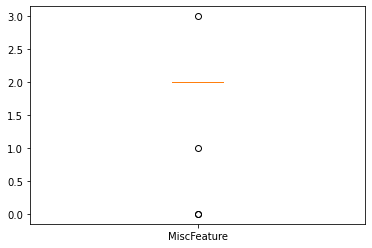

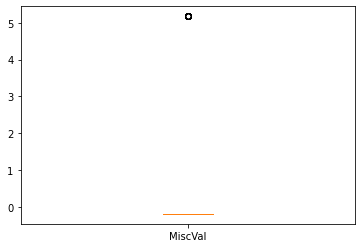

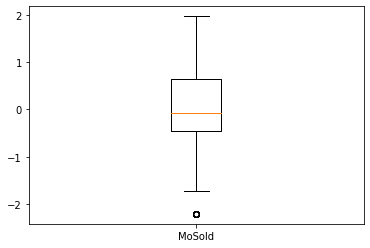

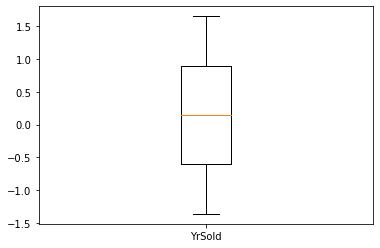

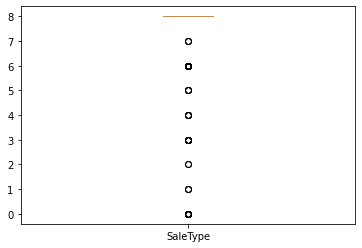

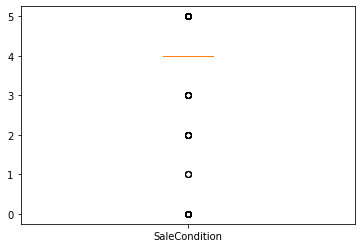

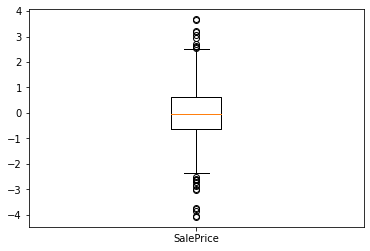

In [60]:
for i in df:
    plt.boxplot(df[i], labels= [i])
    plt.show()

In [61]:
from scipy.stats import zscore

z=np.abs(zscore(df[['LotFrontage','LotArea','OverallQual','OverallCond','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']]))
print(np.where(z>3))

(array([  27,   34,   48,   48,   48,   48,   52,   52,   52,   54,   60,
         86,   96,  113,  119,  124,  137,  141,  141,  159,  174,  191,
        195,  226,  231,  231,  243,  245,  249,  249,  267,  305,  305,
        356,  361,  361,  361,  361,  370,  420,  420,  432,  491,  504,
        510,  517,  537,  537,  558,  558,  592,  592,  592,  592,  592,
        592,  600,  615,  656,  656,  679,  689,  691,  698,  698,  706,
        706,  723,  735,  747,  758,  760,  760,  769,  772,  800,  831,
        831,  834,  846,  846,  865,  865,  884,  897,  899,  902,  902,
        908,  915,  915,  935,  980, 1035, 1038, 1042, 1046, 1053, 1056,
       1067, 1074, 1082, 1094, 1107, 1117, 1120, 1123, 1126, 1147, 1147,
       1148, 1164], dtype=int64), array([3, 4, 2, 4, 5, 6, 2, 5, 6, 4, 4, 4, 4, 1, 1, 4, 4, 0, 6, 4, 1, 0,
       0, 4, 0, 1, 4, 1, 2, 6, 4, 4, 5, 1, 1, 4, 5, 6, 4, 0, 1, 4, 4, 4,
       2, 4, 0, 1, 0, 1, 0, 1, 4, 5, 6, 7, 1, 3, 0, 1, 1, 1, 6, 0, 1, 0,
       1, 3, 4, 

In [62]:
z=np.abs(zscore(df[['LotFrontage','LotArea','OverallQual','OverallCond','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']]))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

print("with outliers::",df.shape)
print("After removing outliers::",df_new.shape)

with outliers:: (1168, 81)
After removing outliers:: (1086, 81)


In [63]:
print ("Percentage of data loss: ", ((1168-1086)/1168)*100)

Percentage of data loss:  7.02054794520548


# Splitting feature and target vatiables

In [64]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [65]:
x.shape

(1168, 80)

In [66]:
y.shape

(1168,)

# Scaling using Min Max Scaler

In [67]:
from sklearn.preprocessing import MinMaxScaler

mn=MinMaxScaler()
x=mn.fit_transform(x)

# Importing Model

In [73]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
rf= RandomForestRegressor()
gb= GradientBoostingRegressor()
mod = [rf,gb]
mod

[RandomForestRegressor(), GradientBoostingRegressor()]

In [75]:
for j in mod:
    for i in range(0,100):
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.22, random_state=i)
        j.fit(xtrain,ytrain)
        pred_train = j.predict(xtrain)
        pred_test= j.predict(xtest)

        print(f"For Model {j} At random state {i}, the training accuracy is: {r2_score(ytrain,pred_train)}")
        print(f"For Model {j} At random state {i}, the testing accuracy is: {r2_score(ytest,pred_test)}")
        print('\n')

For Model RandomForestRegressor() At random state 0, the training accuracy is: 0.9787770499229179
For Model RandomForestRegressor() At random state 0, the testing accuracy is: 0.855925343668634


For Model RandomForestRegressor() At random state 1, the training accuracy is: 0.9806576402749095
For Model RandomForestRegressor() At random state 1, the testing accuracy is: 0.8579218605018907


For Model RandomForestRegressor() At random state 2, the training accuracy is: 0.9793427305464244
For Model RandomForestRegressor() At random state 2, the testing accuracy is: 0.856499016850143


For Model RandomForestRegressor() At random state 3, the training accuracy is: 0.9802257100042523
For Model RandomForestRegressor() At random state 3, the testing accuracy is: 0.8719194923051738


For Model RandomForestRegressor() At random state 4, the training accuracy is: 0.9792880552754326
For Model RandomForestRegressor() At random state 4, the testing accuracy is: 0.8741087481201568


For Model RandomF

For Model RandomForestRegressor() At random state 42, the training accuracy is: 0.9800409660036661
For Model RandomForestRegressor() At random state 42, the testing accuracy is: 0.8438354658745748


For Model RandomForestRegressor() At random state 43, the training accuracy is: 0.979678133310237
For Model RandomForestRegressor() At random state 43, the testing accuracy is: 0.8588388981008854


For Model RandomForestRegressor() At random state 44, the training accuracy is: 0.9791939780193439
For Model RandomForestRegressor() At random state 44, the testing accuracy is: 0.8679408944451321


For Model RandomForestRegressor() At random state 45, the training accuracy is: 0.9808943924173921
For Model RandomForestRegressor() At random state 45, the testing accuracy is: 0.808309819730187


For Model RandomForestRegressor() At random state 46, the training accuracy is: 0.9791015717773929
For Model RandomForestRegressor() At random state 46, the testing accuracy is: 0.8620076159263163


For Mod

For Model RandomForestRegressor() At random state 84, the training accuracy is: 0.9799713413196066
For Model RandomForestRegressor() At random state 84, the testing accuracy is: 0.865446488894622


For Model RandomForestRegressor() At random state 85, the training accuracy is: 0.9800292636022558
For Model RandomForestRegressor() At random state 85, the testing accuracy is: 0.8804461375269957


For Model RandomForestRegressor() At random state 86, the training accuracy is: 0.9792799312085874
For Model RandomForestRegressor() At random state 86, the testing accuracy is: 0.8725810993771086


For Model RandomForestRegressor() At random state 87, the training accuracy is: 0.9787917630855043
For Model RandomForestRegressor() At random state 87, the testing accuracy is: 0.8533563093462834


For Model RandomForestRegressor() At random state 88, the training accuracy is: 0.9801165722248575
For Model RandomForestRegressor() At random state 88, the testing accuracy is: 0.8566591359386808


For Mo

For Model GradientBoostingRegressor() At random state 25, the training accuracy is: 0.9677397671316373
For Model GradientBoostingRegressor() At random state 25, the testing accuracy is: 0.879153525997734


For Model GradientBoostingRegressor() At random state 26, the training accuracy is: 0.9682390195776532
For Model GradientBoostingRegressor() At random state 26, the testing accuracy is: 0.8860133970715647


For Model GradientBoostingRegressor() At random state 27, the training accuracy is: 0.9688712943243443
For Model GradientBoostingRegressor() At random state 27, the testing accuracy is: 0.839209441714539


For Model GradientBoostingRegressor() At random state 28, the training accuracy is: 0.9637468975934882
For Model GradientBoostingRegressor() At random state 28, the testing accuracy is: 0.8717332594111918


For Model GradientBoostingRegressor() At random state 29, the training accuracy is: 0.9655597188747811
For Model GradientBoostingRegressor() At random state 29, the testing a

For Model GradientBoostingRegressor() At random state 65, the training accuracy is: 0.9676500054695523
For Model GradientBoostingRegressor() At random state 65, the testing accuracy is: 0.8809035352330972


For Model GradientBoostingRegressor() At random state 66, the training accuracy is: 0.9665818510888475
For Model GradientBoostingRegressor() At random state 66, the testing accuracy is: 0.8671036902710707


For Model GradientBoostingRegressor() At random state 67, the training accuracy is: 0.9677646021735482
For Model GradientBoostingRegressor() At random state 67, the testing accuracy is: 0.8539775822501131


For Model GradientBoostingRegressor() At random state 68, the training accuracy is: 0.9680718343410704
For Model GradientBoostingRegressor() At random state 68, the testing accuracy is: 0.8618223193598155


For Model GradientBoostingRegressor() At random state 69, the training accuracy is: 0.9677632064080484
For Model GradientBoostingRegressor() At random state 69, the testing

As per above visualization we found model Gradient Boost is best at random state 9

In [76]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.22, random_state=9)
predgb_train = gb.predict(xtrain)
predgb_test= gb.predict(xtest)

print("Mean Squared error", mean_squared_error(ytest,predgb_test))
print("Mean Absolute Error", mean_absolute_error(ytest,predgb_test))

Mean Squared error 0.039897926194323835
Mean Absolute Error 0.14626027010992232


In [77]:
print(r2_score(ytest,predgb_test))

0.9658492002361048


# Grid Search CV

In [79]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()
param_grid = {"n_estimators":[50,100,200,500],'max_depth':[10,20,30],'criterion':['mse','mae']}
xg_grid = GridSearchCV(estimator = model, param_grid = param_grid)
print(xg_grid)
xg_grid.fit(xtrain, ytrain)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200, 500]})


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200, 500]})

In [80]:
print(xg_grid.best_score_)
print(xg_grid.best_estimator_)
print(xg_grid.best_params_)

0.7644353382476637
GradientBoostingRegressor(criterion='mse', max_depth=10, n_estimators=50)
{'criterion': 'mse', 'max_depth': 10, 'n_estimators': 50}


As per Grid Search CV we found the best accuracy when n_estimators=50, criterion= mse, max-depth= 10

In [86]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.22, random_state=9)
GBR = GradientBoostingRegressor(n_estimators=50,criterion= 'mse',max_depth= 10)
GBR.fit(xtrain,ytrain)
predrgbr_train =GBR.predict(xtrain)
predrgbr_test= GBR.predict(xtest)
print("Mean Squared error", mean_squared_error(ytest,predrgbr_test))
print("Mean Absolute Error", mean_absolute_error(ytest,predrgbr_test))

Mean Squared error 0.14756741716822228
Mean Absolute Error 0.27889245310124644


In [87]:
GBR.score(xtrain,ytrain)

0.9999425461704412

# Cross Validation of Model

In [89]:
train_accuracy = r2_score(ytrain,predrgbr_train)
test_accuracy =r2_score(ytest,predrgbr_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score =cross_val_score(GBR,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross val  {j} the cv score  is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross val  2 the cv score  is 0.7686448219231603 and accuracy score for training is 0.9999425461704412 and accuracy for testing is 0.8736890411085048


At cross val  3 the cv score  is 0.7759525620273774 and accuracy score for training is 0.9999425461704412 and accuracy for testing is 0.8736890411085048


At cross val  4 the cv score  is 0.8116162915082394 and accuracy score for training is 0.9999425461704412 and accuracy for testing is 0.8736890411085048


At cross val  5 the cv score  is 0.8133335958736897 and accuracy score for training is 0.9999425461704412 and accuracy for testing is 0.8736890411085048


At cross val  6 the cv score  is 0.8188632615516154 and accuracy score for training is 0.9999425461704412 and accuracy for testing is 0.8736890411085048


At cross val  7 the cv score  is 0.81326773881907 and accuracy score for training is 0.9999425461704412 and accuracy for testing is 0.8736890411085048


At cross val  8 the cv score  is 0.8257270298655786 and accuracy score f

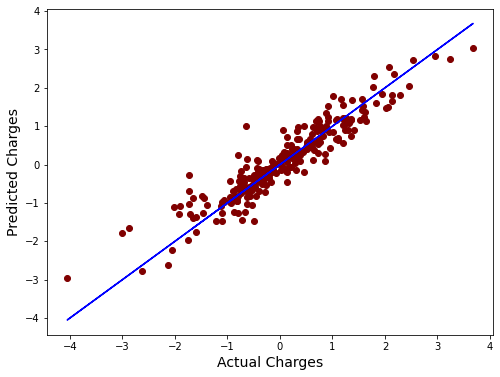

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x= ytest, y =predrgbr_test, color= "maroon")
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Charges', fontsize= 14)
plt.ylabel("Predicted Charges", fontsize=14)
plt.show()

In [91]:
import pickle
filename = 'houseprice.pkl'
pickle.dump(GBR, open(filename, 'wb'))

# Conclusion

In [92]:
loaded_model = pickle.load(open('houseprice.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print(result)

0.8736890411085048


In [93]:
conclusion = pd.DataFrame([loaded_model.predict(xtest)[:],pred_test[:]],index=["Predicted", "Original"])

In [94]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
Predicted,-1.387348,0.452637,0.847714,0.186329,1.530201,-0.718040,0.218745,-1.260541,0.315431,0.536956,...,0.590235,1.017215,-0.439460,0.105820,0.180159,0.051256,-0.127119,0.891448,-0.098116,0.171882
Original,-1.448731,1.358405,0.452463,0.202466,-0.344388,-0.124173,0.273955,0.342804,0.463406,0.937973,...,-0.422125,0.301774,-0.345535,1.370938,0.213117,-0.893808,-0.479829,1.234763,-0.943612,-2.395819
